In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data3.csv')
data = df.values
np.random.shuffle(data)
X = data[:, :2]
y = data[:, 2].reshape(-1, 1)

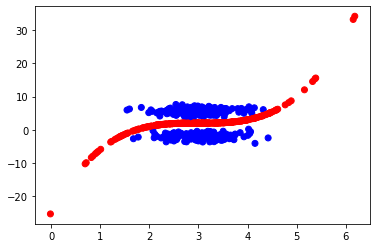

In [3]:
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

def loss(y_true, y_pred):
    s = np.multiply(y_true, np.log(y_pred)) + np.multiply((1 - y_true), 1 - np.log(y_pred))
    return - 1 / y_true.shape[0] * (np.sum(s))

In [5]:
class DNN:
    
    def __init__(self, layers=(2, 9, 1), lr=0.01, max_iter=10000, tol=0.001):
        
        self.layers = layers
        self.lr = lr
        self.max_iter = max_iter
        self.tol  = tol
        self.loss_history = []
        self.x = None
        self.y = None
        self.arr = None
        self.multiplier = None
    
    def init_weights(self, input_size):
        np.random.seed(42)
        self.b = [np.zeros((self.layers[i], )) for i in range(1, len(self.layers))]
        self.w = [np.random.randn(self.layers[i], self.layers[i + 1]) for i in range(len(self.layers) - 1)]
    
    def forward_propagation(self, xx=None, predict=False):
        x = xx if xx is not None else self.x
        self.arr = [np.copy(x)]
        Z = self.arr[0]
        for i in range(len(self.layers) - 2):
            Z = np.dot(Z, self.w[i]) + self.b[i]
            self.arr.append(Z)
            Z = sigmoid(Z)
            self.arr.append(Z)
        Z = np.dot(Z, self.w[-1]) + self.b[-1]
        self.arr.append(Z)
        Z = sigmoid(Z)
        if not predict:
            self.arr.append(Z)
            self.loss_history.append(loss(self.y, Z))
        return Z
    
    def back_propagation(self, y_pred):
        delta = self.y - y_pred
        w_upd = []
        w_ = self.w + [np.array(1)]
        for i in range(len(self.layers) - 1, 0, -1):
            delta = delta.dot(w_[i].T) * sigmoid_derivative(self.arr[2 * i])
            dw = self.arr[2 * (i - 1)].T.dot(delta)
            db = np.sum(delta, axis=0)
            w_upd.append(dw)
            w_upd.append(db)
        for i in range(len(self.w) - 1, -1, -1):
            self.w[-i - 1] += self.lr * w_upd[2 * i]
            self.b[-i - 1] += self.lr * w_upd[2 * i + 1]
        self.arr = None
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.init_weights(x.shape[1])
        for i in range(self.max_iter):
#             print(f'epoch {i}')
            y_pred = self.forward_propagation()
            self.back_propagation(y_pred)
    
    def predict(self, x):
        return np.round(self.forward_propagation(x, predict=True))

In [6]:
for h_layers in [1, 2, 3]:
    for h_size in [3, 4, 7, 10]:
        nn = DNN(layers=[2] + [h_size] * h_layers + [1])
        nn.fit(X, y)
        acc = accuracy_score(y, nn.predict(X))
        print(f'Hidden layers: {h_layers}, layer size: {h_size}, accuracy: {acc}')

Hidden layers: 1, layer size: 3, accuracy: 0.98
Hidden layers: 1, layer size: 4, accuracy: 0.98
Hidden layers: 1, layer size: 7, accuracy: 1.0
Hidden layers: 1, layer size: 10, accuracy: 1.0
Hidden layers: 2, layer size: 3, accuracy: 0.9833333333333333
Hidden layers: 2, layer size: 4, accuracy: 0.9816666666666667
Hidden layers: 2, layer size: 7, accuracy: 1.0
Hidden layers: 2, layer size: 10, accuracy: 1.0
Hidden layers: 3, layer size: 3, accuracy: 0.9816666666666667
Hidden layers: 3, layer size: 4, accuracy: 0.9833333333333333
Hidden layers: 3, layer size: 7, accuracy: 0.9933333333333333
Hidden layers: 3, layer size: 10, accuracy: 0.985


In [7]:
nn = DNN(layers=(2, 10, 1))
nn.fit(X, y)
accuracy_score(y, nn.predict(X))

1.0

In [8]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = pred.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(15, 12))
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    y_pred = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

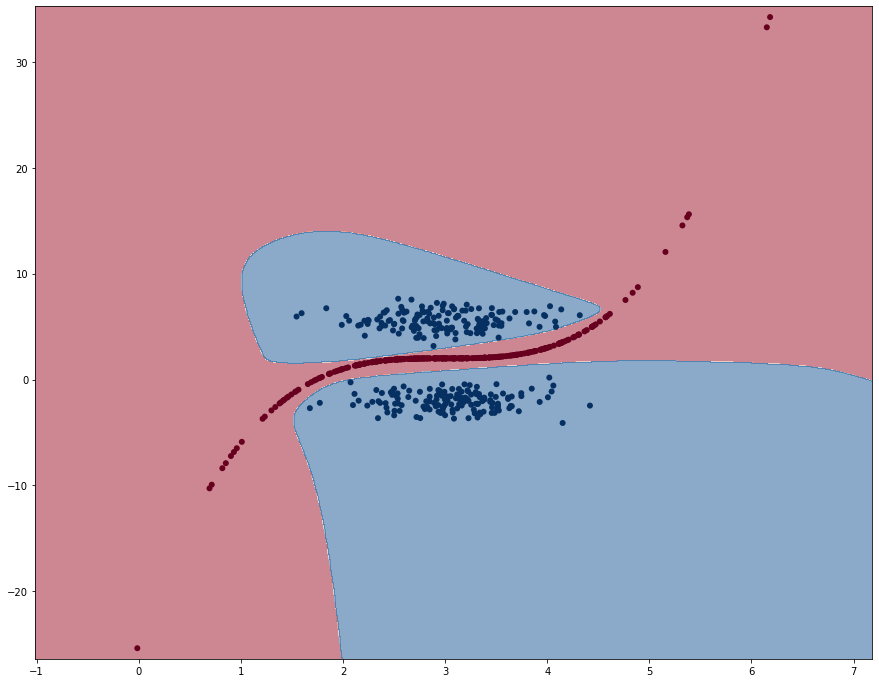

In [9]:
plot_decision_boundary(X, y, nn, cmap='RdBu')
plt.savefig('decision_boundary.png')